In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [86]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5clYeacotsk1hfncejimhFTQXKBC5gVejOmkUnMJmpwK',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'amazonalexareviewssentimentanalys-donotdelete-pr-shfaylvjvgyayl'
object_key = 'amazon.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [87]:
print(df_data_1.describe)

<bound method NDFrame.describe of       rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...              

In [88]:
print(df_data_1.head())#first five rows from the dataset

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


In [89]:
print(df_data_1.shape)#number of rows and columns

(3150, 5)


In [90]:
print(df_data_1.columns)#displays the column names from the dataset

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


In [91]:
print(df_data_1.dtypes)#print the datatypes of each columns

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object


In [92]:
df_data_1.info()# to get more information about your data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [93]:
print(df_data_1.tail(n=10))# get the last row

      rating       date   variation  \
3140       4  30-Jul-18  White  Dot   
3141       3  30-Jul-18  Black  Dot   
3142       4  30-Jul-18  White  Dot   
3143       5  30-Jul-18  Black  Dot   
3144       5  30-Jul-18  Black  Dot   
3145       5  30-Jul-18  Black  Dot   
3146       5  30-Jul-18  Black  Dot   
3147       5  30-Jul-18  Black  Dot   
3148       5  30-Jul-18  White  Dot   
3149       4  29-Jul-18  Black  Dot   

                                       verified_reviews  feedback  
3140                                              Barry         1  
3141                                                            1  
3142  My three year old loves it.  Good for doing ba...         1  
3143         Awesome device wish I bought one ages ago.         1  
3144                                            love it         1  
3145  Perfect for kids, adults and everyone in betwe...         1  
3146  Listening to music, searching locations, check...         1  
3147  I do love these thin

In [94]:
print(df_data_1.isnull())

      rating   date  variation  verified_reviews  feedback
0      False  False      False             False     False
1      False  False      False             False     False
2      False  False      False             False     False
3      False  False      False             False     False
4      False  False      False             False     False
...      ...    ...        ...               ...       ...
3145   False  False      False             False     False
3146   False  False      False             False     False
3147   False  False      False             False     False
3148   False  False      False             False     False
3149   False  False      False             False     False

[3150 rows x 5 columns]


In [95]:
df_data_1.isnull().sum()#in only verified_reviews i have only one null value

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [96]:
df_data_1.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [97]:
#use .any() function to get concise info
df_data_1.isna().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

In [98]:
#. isna()detects missing values
df_data_1.isna()

,rating,date,variation,verified_reviews,feedback
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3145,False,False,False,False,False
3146,False,False,False,False,False
3147,False,False,False,False,False
3148,False,False,False,False,False


In [99]:
df_data_1.values# values atttributes returns a numpy representation of the gi

array([[5, '31-Jul-18', 'Charcoal Fabric ', 'Love my Echo!', 1],
       [5, '31-Jul-18', 'Charcoal Fabric ', 'Loved it!', 1],
       [4, '31-Jul-18', 'Walnut Finish ',
        'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
        1],
       ...,
       [5, '30-Jul-18', 'Black  Dot',
        'I do love these things, i have them running my entire home, TV, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home like its right out of star trek.... I named mine computer to get the feel... but its amazing what you can do with these devices and smart systems.',
        1],
       [5, '30-Jul-18', 'White  Dot',
        "Only complaint I have is that the sound quality isn

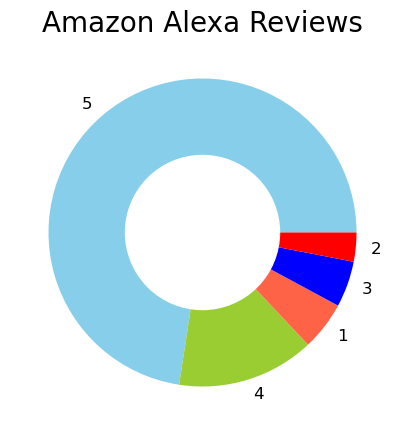

In [100]:
ratings = df_data_1["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Amazon Alexa Reviews", fontsize=20)
plt.show()
fig.savefig('pie chart.png')

In [101]:
import numpy as np
 
print(np.var([1,9,5,6,8,7]))
print(np.var([4,-11,-5,16,5,7,9]))

6.666666666666667
69.10204081632652


<Axes: >

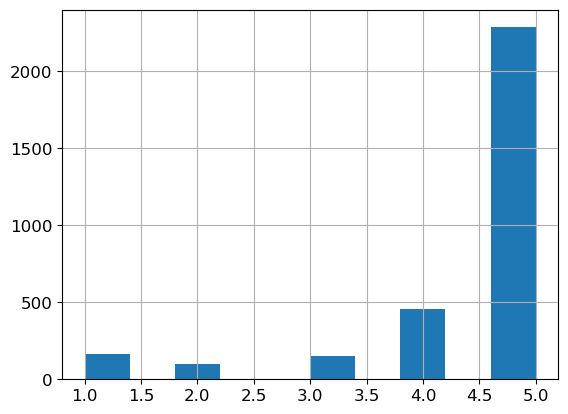

In [102]:
df_data_1['rating'].hist()

<Axes: >

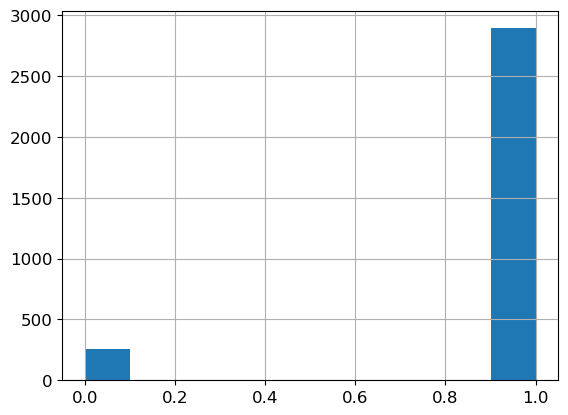

In [103]:
df_data_1['feedback'].hist()

<Axes: >

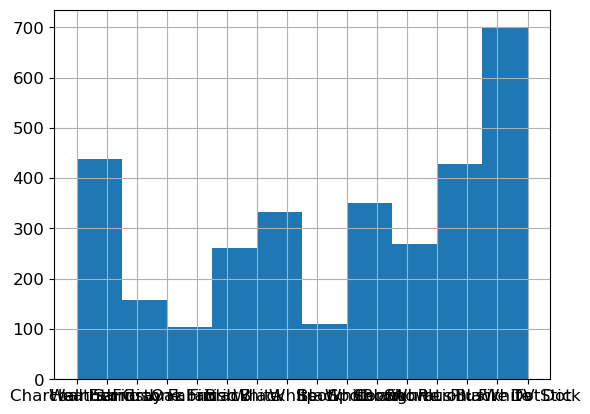

In [104]:
df_data_1['variation'].hist()

In [105]:
amazon_backup = df_data_1.copy()
missing_amazon_data = amazon_backup[amazon_backup.isnull().any(axis=1)]
missing_amazon_data

,rating,date,variation,verified_reviews,feedback


In [106]:
amazon_backup.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000
